In [9]:
# Reading Training Data
train_data<-read.csv(file="~/Desktop/all/train.csv",stringsAsFactors = FALSE)

In [10]:
head(train_data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [11]:
# Total No of Rows
nrow(train_data)

[1] 891

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


ERROR: Error: ggplot2 doesn't know how to deal with data of class uneval


In [12]:
test_data<-read.csv(file="~/Desktop/all/test.csv",stringsAsFactors = FALSE)

In [13]:
#Columns Age, Embarked have NAs
summary(train_data)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [37]:
# Train Set
# Age - Replacing NAs with Median Age
# Embarked - Replacing NAs with Mode
train_data[is.na(train_data$Age),"Age"]<-median(train_data$Age,na.rm=TRUE)
Embarked_Dist<-(table(train_data$Embarked))
train_data[train_data$Embarked=='',"Embarked"]<-names(Embarked_Dist[which.max(Embarked_Dist)])
train_data$Pclass<-ordered(train_data$Pclass, levels = c("1", "2", "3"))
cols<-c("Survived","Sex","Embarked")
train_data[cols] <- lapply(train_data[cols], factor)
str(train_data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 28 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


In [72]:
library(ggplot2)

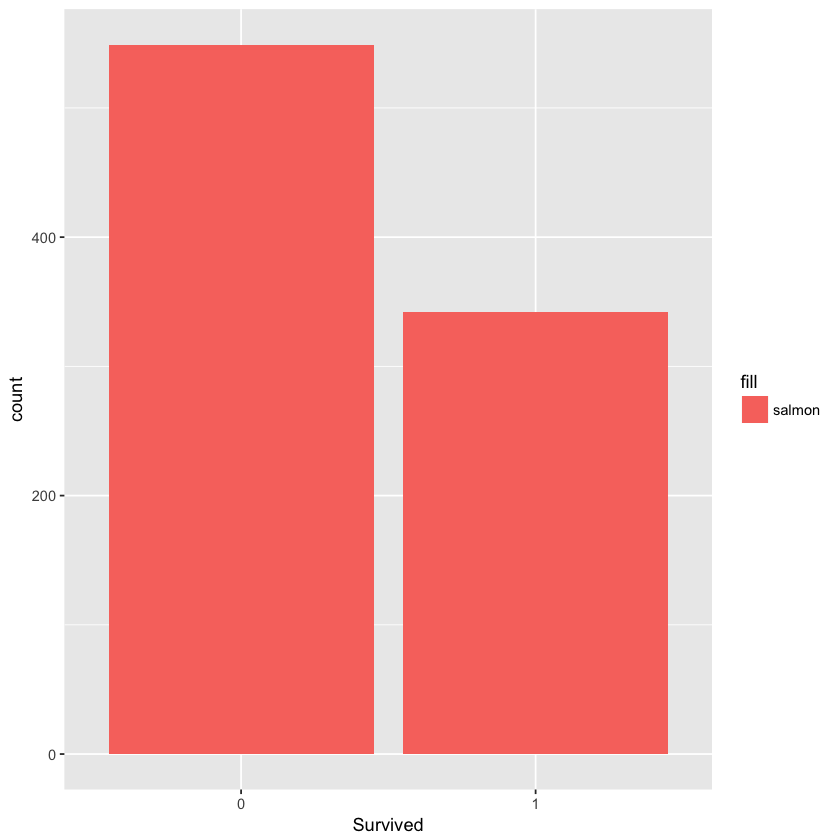

In [74]:
ggplot(train_data, aes(Survived, fill="salmon")) + geom_bar()

In [38]:
# Test Set 
# Fare - Replacing NA with Median Fare
test_data[is.na(test_data$Fare),"Fare"]<-median(test_data$Fare,na.rm = TRUE)
cols<-c("Sex","Embarked")
test_data[cols] <- lapply(test_data[cols], factor)
test_data$Pclass<-ordered(test_data$Pclass, levels = c("1", "2", "3"))
str(test_data)

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : Ord.factor w/ 3 levels "1"<"2"<"3": 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  "" "" "" "" ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


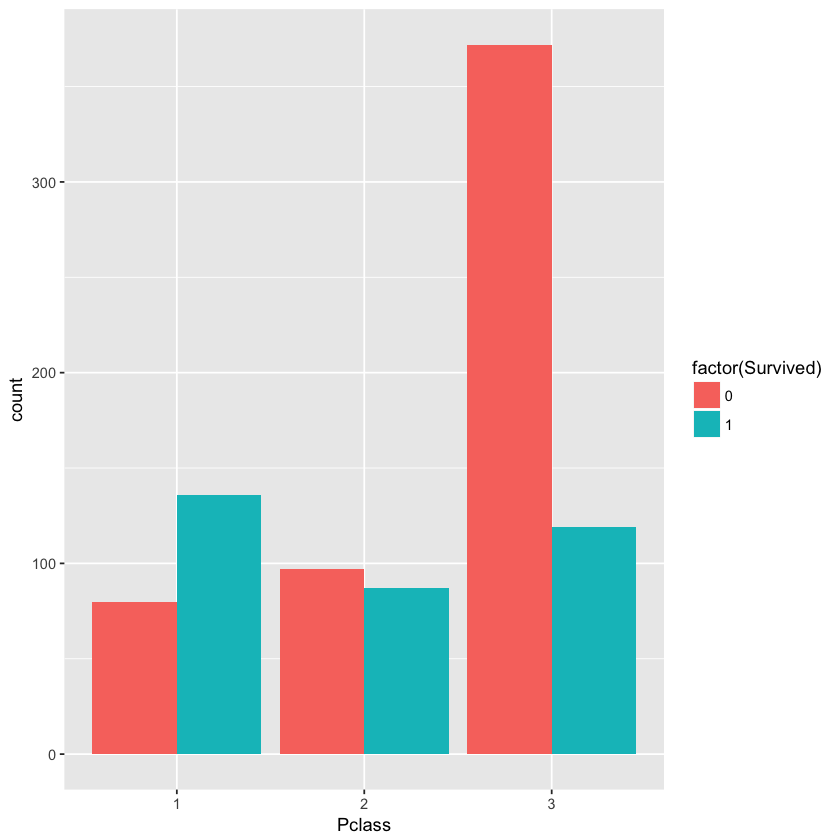

In [75]:
ggplot(train_data, aes(Pclass, ..count.., fill = factor(Survived))) + geom_bar(position="dodge")

In [ ]:
# Class played a major role in surviving 

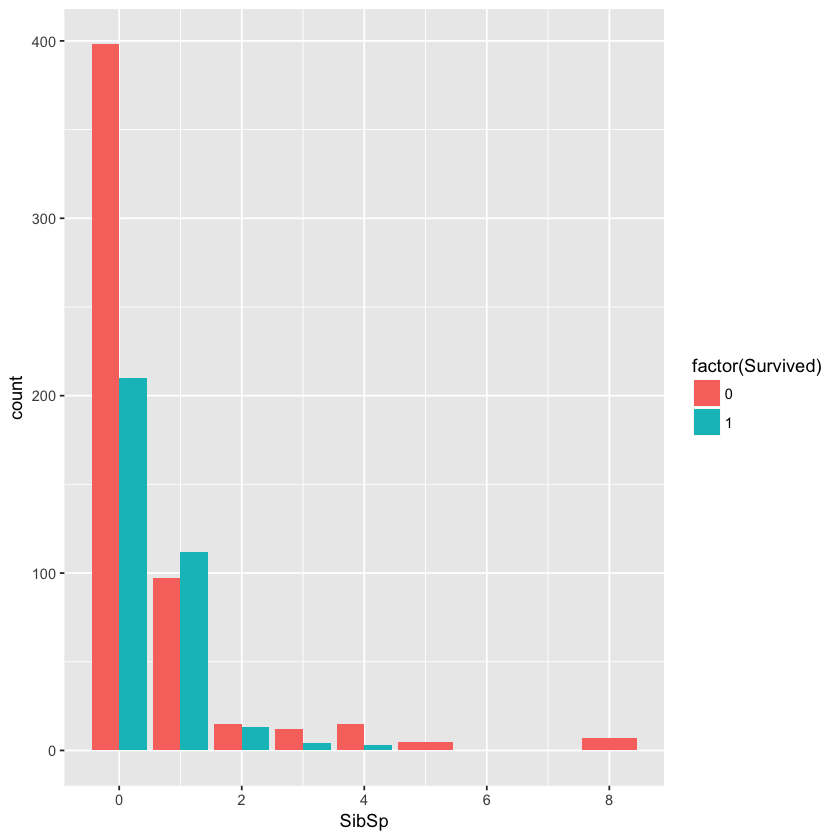

In [76]:
ggplot(train_data, aes(SibSp, ..count.., fill = factor(Survived))) + geom_bar(position="dodge")

In [ ]:
# Blood is thicker than wood
# Siblings Have helped each other in survival

In [39]:
# Splitting Train data in order to check which Model performs better later 
install.packages("caTools")
library(caTools)
set.seed(40)
sample = sample.split(train_data$Survived, SplitRatio = .75)
train_data_1 = subset(train_data, sample == TRUE)
train_data_2 = subset(train_data, sample == FALSE)


The downloaded binary packages are in
	/var/folders/xp/1g05_jbx7yx3795j7klx40_40000gn/T//Rtmp4vkwJk/downloaded_packages


In [40]:
# Logistic Regression
logistic_model<-glm(Survived~Pclass+Sex+Age+Fare+Embarked,family=binomial(link='logit'),data=train_data_1)


In [41]:
summary(logistic_model)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + Fare + Embarked, 
    family = binomial(link = "logit"), data = train_data_1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5175  -0.6369  -0.3684   0.6252   2.5404  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.088904   0.439800   7.023 2.16e-12 ***
Pclass.L    -1.862275   0.245610  -7.582 3.40e-14 ***
Pclass.Q    -0.073246   0.212342  -0.345 0.730138    
Sexmale     -2.689267   0.225362 -11.933  < 2e-16 ***
Age         -0.031164   0.008734  -3.568 0.000359 ***
Fare        -0.002444   0.002536  -0.964 0.335154    
EmbarkedQ   -0.162255   0.432740  -0.375 0.707699    
EmbarkedS   -0.817143   0.286787  -2.849 0.004381 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 889.27  on 667  degrees of freedom
Residual deviance: 581.09  on 660  degrees of freedom
AIC: 597.09

Number 

In [42]:

# Fitting the Model

logisitc_model_fitted<-predict(logistic_model, newdata=train_data_2, type="response")

logisitc_model_fitted<-ifelse(logisitc_model_fitted>0.5,1,0)
logisitc_model_fitted<-as.factor(logisitc_model_fitted)

# Confusion matrix
library(caret)
confusionMatrix(logisitc_model_fitted, train_data_2$Survived)



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 115  25
         1  22  61
                                          
               Accuracy : 0.7892          
                 95% CI : (0.7298, 0.8408)
    No Information Rate : 0.6143          
    P-Value [Acc > NIR] : 1.714e-08       
                                          
                  Kappa : 0.5523          
 Mcnemar's Test P-Value : 0.7705          
                                          
            Sensitivity : 0.8394          
            Specificity : 0.7093          
         Pos Pred Value : 0.8214          
         Neg Pred Value : 0.7349          
             Prevalence : 0.6143          
         Detection Rate : 0.5157          
   Detection Prevalence : 0.6278          
      Balanced Accuracy : 0.7744          
                                          
       'Positive' Class : 0               
                                          

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



ERROR: Error in prediction(logisitc_model_fitted, train_data_2$Survived): Format of predictions is invalid.


In [45]:
# Area under the curve 
library(ROCR)

pr <- prediction(as.numeric(logisitc_model_fitted), as.numeric(train_data_2$Survived))

[1] 0.7743592

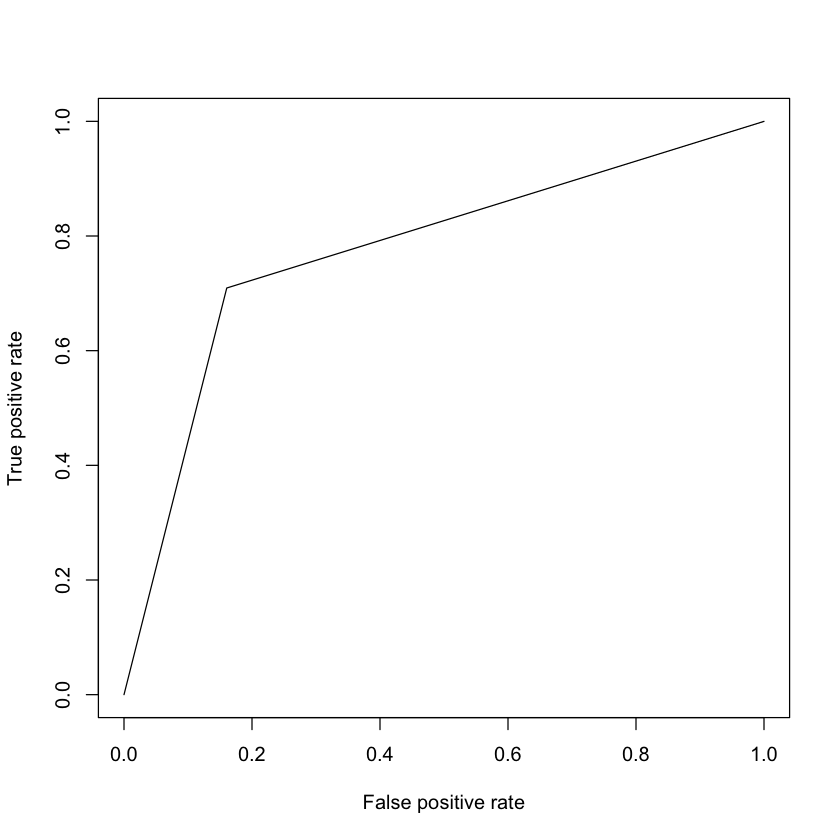

In [46]:

prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [48]:
# Naive Bayes Model
library(e1071)
naive_bayes_model<-naiveBayes(Survived~Pclass+Sex+Age+Fare+Embarked,data=train_data_2)

In [52]:
navie_bayes_predict<-predict(naive_bayes_model, newdata=train_data_2, type="class")

Warning message in data.matrix(newdata):
“NAs introduced by coercion”Warning message in data.matrix(newdata):
“NAs introduced by coercion”Warning message in data.matrix(newdata):
“NAs introduced by coercion”

In [53]:
table(navie_bayes_predict, train_data_2$Survived,dnn=c("Prediction","Actual"))

          Actual
Prediction   0   1
         0 126  47
         1  11  39

In [ ]:
# Logistic Regressions has done better than Navive bayes
#So I am going to implement Logistic Regressions in test set 

In [54]:
final_model<-glm(Survived~Pclass+Sex+Age+Fare+Embarked,family=binomial(link='logit'),data=test_data)

ERROR: Error in eval(predvars, data, env): object 'Survived' not found


In [56]:
survived_prediction<-predict(logistic_model, newdata=test_data, type="response")

In [58]:
survived_prediction<-ifelse(survived_prediction>0.5,1,0)
table(survived_prediction)

survived_prediction
  0   1 
193 139 

In [ ]:
# out of test set the model predict 193 will sink and 139 will survive 